<h1> <center> GEOG 172: INTERMEDIATE GEOGRAPHICAL ANALYSIS </h1>
    <h2> <center> Evgeny Noi </h2>
        <h3> <center> Lecture 11: Local Spatial Autocorrelation </h3>

# Review 

* Correlation versus Autocorrelation
* Global Spatial Autocorrelation (positive: HH/LL; negative: HL/LH). 
* Moran's $I$, Geary's $C$ and Getis & Ord's $G$ 

# Global versus Local Moran's $I$ 

$$
I = \frac{\sum_i \sum_j w_{ij} z_iz_j}{\sum_i z_i^2},
$$

$$
I_i = \frac{\sum_j w_{ij} z_iz_j}{\sum_i z_i^2}.
$$

where $z_i = x_i - \bar{x}$ (standardized value of the variable).

# Local Moran's $I$ 

* Originally conceived to define local *spatial clusters* and *spatial outliers* 
    * spatial clusters (high-high, low-low)
    * spatial outliers (high-low, low-high)
* The sum of the local statistics is proporational to the global Moran’s I, or, alternatively, that the global Moran’s I corresponds with the average of the local statistics
* Significance is assessed via a permutation inference (!!! Multiple Comparisons)

# Multiple Comparisons 

> Situation when statistical analysis involves multiple simultaneous statistical tests, each of which has a potential to produce a "discovery."). A stated confidence level generally applies only to each test considered individually, but often it is desirable to have a confidence level for the whole family of simultaneous tests. Failure to compensate for multiple comparisons can have important real-world consequences.

Take the case of $S = 100$ hypotheses being tested at the same time, all of them being true, with the size and level of each test exactly equal to $\alpha$. For $\alpha = 0.05$, one expects five true hypotheses to be rejected. Further, if all tests are mutually independent, then the probability that at least one true null hypothesis will be rejected is given by $1 − 0.95^{100} = 0.994$.

# Multiple Comparisons and LISA 

* Traditional choice of 0.05 is likely to lead to many false positives, i.e., rejections of the null when in fact it holds.
* Bonferonni bounds ($\alpha/n$) - very conservative (use to identify cluster centers) 
* False Discovery Rate - less conservative 
    * Sort $I_i$ p-values in the increasing order (variable $I$ denotes order) 
    * $FDR = i \times \alpha/n$ (for first observation: $FDR = 1 \times 0.05/85 = 0.000118$ 
    * Select all observations where $p_{i_{max}} \leq i \times \alpha / n$

In [1]:
from libpysal.examples import load_example
import geopandas as gpd
guerry_loc = load_example('Guerry')
guerry = gpd.read_file(guerry_loc.get_path('guerry.geojson'))
print(guerry.shape)
guerry.head()

Example not available: Guerry


Example not downloaded: Chicago parcels
Example not downloaded: Chile Migration
Example not downloaded: Spirals


(85, 24)


,dept,Region,Dprtmnt,Crm_prs,Crm_prp,Litercy,Donatns,Infants,Suicids,MainCty,...,Infntcd,Dntn_cl,Lottery,Desertn,Instrct,Prsttts,Distanc,Area,Pop1831,geometry
0,1,E,Ain,28870,15890,37,5098,33120,35039,2,...,60,69,41,55,46,13,218.372,5762,346.03,"MULTIPOLYGON (((801150.00000 2092615.00000, 80..."
1,2,N,Aisne,26226,5521,51,8901,14572,12831,2,...,82,36,38,82,24,327,65.945,7369,513.00,"MULTIPOLYGON (((729326.00000 2521619.00000, 72..."
2,3,C,Allier,26747,7925,13,10973,17044,114121,2,...,42,76,66,16,85,34,161.927,7340,298.26,"MULTIPOLYGON (((710830.00000 2137350.00000, 71..."
3,4,E,Basses-Alpes,12935,7289,46,2733,23018,14238,1,...,12,37,80,32,29,2,351.399,6925,155.90,"MULTIPOLYGON (((882701.00000 1920024.00000, 88..."
4,5,E,Hautes-Alpes,17488,8174,69,6962,23076,16171,1,...,23,64,79,35,7,1,320.280,5549,129.10,"MULTIPOLYGON (((886504.00000 1922890.00000, 88..."


In [2]:
from pysal.explore import esda  # Exploratory Spatial analytics
from pysal.lib import weights  # Spatial weights
from splot.esda import moran_scatterplot, lisa_cluster
from esda.moran import Moran, Moran_Local
from splot.esda import plot_local_autocorrelation
from splot.esda import plot_moran
import matplotlib.pyplot as plt

C:\Users\barguzin\anaconda3\envs\geo_env\lib\site-packages\spaghetti\network.py:36: FutureWarning: The next major release of pysal/spaghetti (2.0.0) will drop support for all ``libpysal.cg`` geometries. This change is a first step in refactoring ``spaghetti`` that is expected to result in dramatically reduced runtimes for network instantiation and operations. Users currently requiring network and point pattern input as ``libpysal.cg`` geometries should prepare for this simply by converting to ``shapely`` geometries.
  warnings.warn(f"{dep_msg}", FutureWarning)


In [3]:
y = guerry['Crm_prp'].values
w = weights.Queen.from_dataframe(guerry)
w.transform = 'r'

# calculate global
moran = Moran(y, w)
print("Moran's I:", moran.I)
print("Moran's p-val:", moran.p_sim)

Moran's I: 0.26355334031776523
Moran's p-val: 0.001


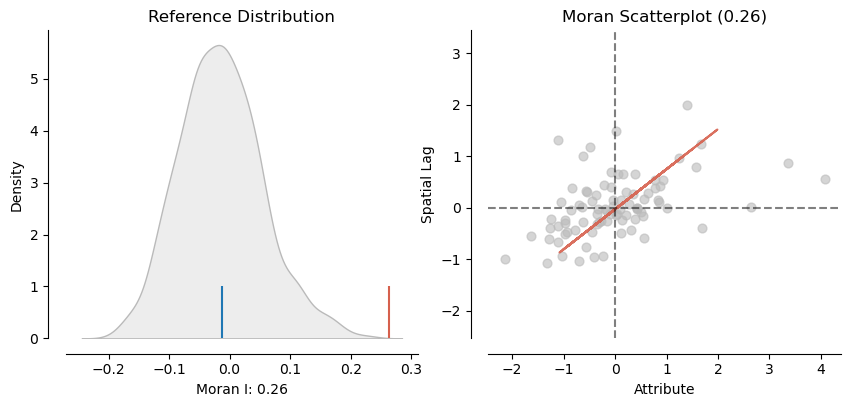

In [4]:
plot_moran(moran, zstandard=True, figsize=(10,4))
plt.show()

<img src="https://geographicdata.science/book/_images/07_local_autocorrelation_21_0.png">

In [5]:
# calculate Moran_Local and plot
moran_loc = Moran_Local(y, w)

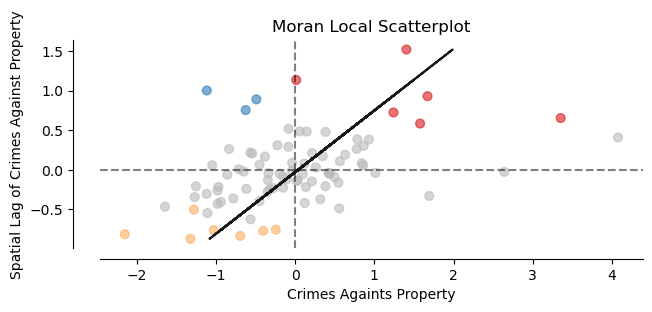

In [6]:
fig, ax = moran_scatterplot(moran_loc, p=0.05)
ax.set_xlabel('Crimes Againts Property')
ax.set_ylabel('Spatial Lag of Crimes Against Property')
plt.show()

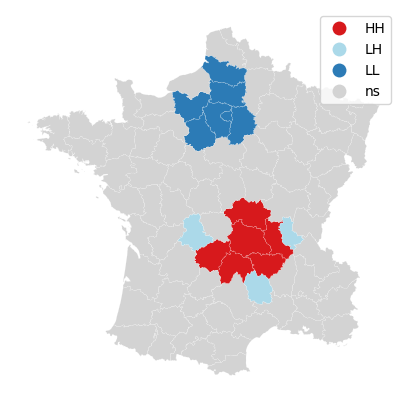

In [7]:
lisa_cluster(moran_loc, guerry, p=0.05, figsize = (5,5), aspect=1)
plt.show()

In [8]:
# Calculate the p-value cut-off to control 
# for the false discovery rate (FDR) for multiple testing.
print(esda.fdr(moran_loc.p_sim, 0.05)) # Bonferonni
print(esda.fdr(moran_loc.p_sim, 0.1)) # FDF cut-off

0.003529411764705883
0.010588235294117647


# Extensions to Local Moran's $I$ 

* Bivariate Local Moran's $I$ 
* Differential Local Moran's $I$ 
* Local Moran's $I$ with EB rates

# Local Geary's $c$ 

$$
LG_i = \sum_j w_{ij}(x_i - x_j)^2
$$

While calculating Geary's c is possible in Python the plots are not yet automated. Use GeoDa for comparisons! 

# Local Getis & Ord's $G$

$$
G_i = \frac{\sum_{j \neq i} w_{ij} x_j}{\sum_{j \neq i} x_j} \quad \text{not including value at location i} 
$$

$$
G_i^* = \frac{\sum_j w_{ij} x_j}{\sum_j x_j}
$$

In contrast to the Local Moran and Local Geary statistics, the Getis-Ord approach does not consider spatial outliers. Calculations similar to Local Geary's $C$

# Interim Data Report

## Class exercise 

> Work in pairs. Tell one another what data you are working in and what questions you hope to answer with the methods we've learned in class. 

### Due: Sunday (Nov 6, 2022) 

# Questions? 